IRSA Explainer: https://wise2.ipac.caltech.edu/docs/release/allwise/expsup/sec2_1a.html

Stars within 100 pc of the Sun:  https://www.aanda.org/articles/aa/full_html/2021/05/aa39498-20/aa39498-20.html

LAMOST data cleaning procedure: https://iopscience.iop.org/article/10.3847/1538-4357/acaf5a/pdf
        

In [106]:
from astropy.io import fits
from astropy.table import Table, join, unique

from astropy.coordinates import SkyCoord
import astropy.units as u

from astropy.utils.metadata import merge
from astroquery.xmatch import XMatch

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


from multiprocessing import set_start_method

plt.style.use('stefan.mplstyle')

In [107]:
catalog = Table.read('data/all_wds.dat', format='ipac')

table = XMatch.query(cat1=catalog,
                     cat2='vizier:I/355/gaiadr3',
                     max_distance=3 * u.arcsec, colRA1='ra',
                     colDec1='dec')

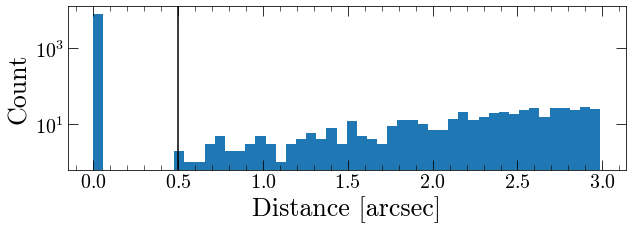

In [108]:
plt.figure(figsize = (10,3))
plt.hist(table['angDist'], bins = 50)
plt.axvline(x = 0.5, c = 'k')
plt.xlabel('Distance [arcsec]')
plt.ylabel('Count')
plt.yscale('log')

table = table[table['angDist'] < 0.4]
table.rename_column('angDist', 'angDist_gaia')

In [111]:
table = XMatch.query(cat1=table,
                     cat2='vizier:II/328/allwise',
                     max_distance=10 * u.arcsec, colRA1='ra',
                     colDec1='dec', kwargs = dict(cols2 = "AllWISE,eeMaj,eeMin,\
                                                             eePA,W1mag,W2mag,W3mag,W4mag,Jmag,Hmag,Kmag,\
                                                             e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag,e_Hmag,e_Kmag,\
                                                             snr1,chi2W1,snr2,chi2W2,snr3,chi2W3,snr4,chi2W4,\
                                                             ID,ccf,ex,var,qph,pmRA_2,e_pmRA_2,pmDE_2,e_pmDE_2,d2M"))

In [112]:
table

angDist_1,angDist_2,angDist_gaia,CATALOGID,ra,dec,SNR_SnowWhite,WD_TYPE,Teff_SnowWhite,E_Teff_SnowWhite,Logg_SnowWhite,E_Logg_SnowWhite,SPEC_FILE,DR3Name,RAdeg,DEdeg,errHalfMaj,errHalfMin,errPosAng,SolID,Source,RandomI,e_RAdeg,e_DEdeg,Plx,e_Plx,RPlx,PM,pmRA_1,e_pmRA_1,pmDE_1,e_pmDE_1,RADEcor,RAPlxcor,RApmRAcor,RApmDEcor,DEPlxcor,DEpmRAcor,DEpmDEcor,PlxpmRAcor,PlxpmDEcor,pmRApmDEcor,NAL,NAC,NgAL,NbAL,gofAL,chi2AL,epsi,sepsi,Solved,APF,nueff,pscol,e_pscol,RApscolCorr,DEpscolCorr,PlxpscolCorr,pmRApscolCorr,pmDEpscolCorr,MatchObsA,Nper,amax,MatchObs,IPDgofha,IPDgofhp,IPDfmp,IPDfow,RUWE,Dup,o_Gmag,FG,e_FG,RFG,Gmag,e_Gmag,o_BPmag,FBP,e_FBP,RFBP,BPmag,e_BPmag,o_RPmag,FRP,e_FRP,RFRP,RPmag,e_RPmag,E(BP/RP),NBPcont,NBPblend,NRPcont,NRPblend,Mode,BP-RP,BP-G,G-RP,RV,e_RV,n_RV,o_RV,o_RVd,RVNper,RVS/N,RVgof,RVchi2,RVTdur,RVamp,RVtempTeff,RVtemplogg,RVtemp[Fe/H],Vatmparam,vbroad,e_Vbroad,o_Vbroad,GRVSmag,e_GRVSmag,o_GRVSmag,RVSS/N,VarFlag,PQSO,PGal,PSS,Teff,b_Teff,B_Teff,logg,b_logg,B_logg,[Fe/H],b_[Fe/H],B_[Fe/H],Dist,b_Dist,B_Dist,A0,b_A0,B_A0,AG,b_AG,B_AG,E(BP-RP),b_E(BP-RP),B_E(BP-RP),Lib,RAJ2000_1,DEJ2000_1,e_RAJ2000,e_DEJ2000,RADEcorJ2000,AllWISE_1,RAJ2000_2,DEJ2000_2,eeMaj_1,eeMin_1,eePA_1,W1mag_1,W2mag_1,W3mag_1,W4mag_1,Jmag_1,Hmag_1,Kmag_1,e_W1mag_1,e_W2mag_1,e_W3mag_1,e_W4mag_1,e_Jmag_1,e_Hmag_1,e_Kmag_1,ID_1,ccf_1,ex_1,var_1,qph_1,pmRA_2,e_pmRA_2,pmDE_2,e_pmDE_2,d2M_1,AllWISE_2,RAJ2000,DEJ2000,eeMaj_2,eeMin_2,eePA_2,W1mag_2,W2mag_2,W3mag_2,W4mag_2,Jmag_2,Hmag_2,Kmag_2,e_W1mag_2,e_W2mag_2,e_W3mag_2,e_W4mag_2,e_Jmag_2,e_Hmag_2,e_Kmag_2,ID_2,ccf_2,ex_2,var_2,qph_2,pmRA,e_pmRA,pmDE,e_pmDE,d2M_2
float64,float64,float64,int64,float64,float64,float64,str4,float64,float64,float64,float64,str40,str28,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,int64,float64,int64,float64,float64,float64,int64,int64,int64,int64,float64,float64,int64,int64,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,float64,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str4,int64,str4,str4,int64,int64,int64,int64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str4,int64,str4,str4,int64,int64,int64,int64,float64
7.397278,7.397278,0.002723,27021598103379445,120.4969253540039,15.866364479064941,5.097006797790527,DA,12299.9814453125,425.1203308105469,8.517980575561523,0.0008913392666727304,spec-101953-59879-27021598103379445.fits,Gaia DR3 655058756899756800,120.49692462424,15.8663647605,0.0,0.0,97,1636148068921376768,655058756899756800,95692347,0.4014,0.2857,2.6801,0.5019,5.3396,11.72,-11.618,0.532,1.545,0.355,-0.086,-0.1954,-0.1276,0.07,-0.32,-0.0944,0.5804,0.2019,-0.4493,-0.2564,307,0,306,1,1.2225,348.37,0.763,0.6289,31,0,1.699,--,--,--,--,--,--,--,35,18,0.766395,37,0.02418,106.1,0,0,1.049,0,311,215.64416,0.95079,226.805,19.853024,0.005523,31,138.085,8.82633,15.6447,19.988176,0.069456,30,100.772,9.1402,11.0251,19.73955,0.098551,1.108,0,0,0,0,0,0.248627,0.135153,0.113474,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,NO

KeyError: 'Column angDist_WISE already exists'

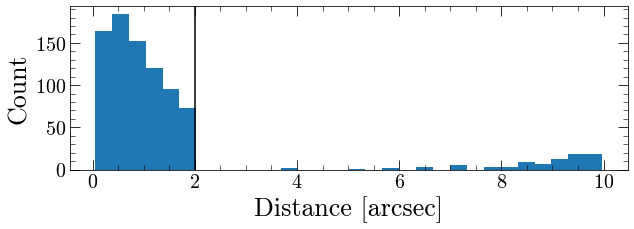

In [99]:
plt.figure(figsize = (10,3))
plt.hist(table['angDist'], bins = 30)
plt.axvline(x = 2, c = 'k')
plt.xlabel('Distance [arcsec]')
plt.ylabel('Count')

table = table[table['angDist'] < 2]
table.rename_columns(['angDist', 'Source'], ['angDist_WISE', 'source_id'])

In [80]:
table[0:10]

angDist_WISE,angDist_gaia,CATALOGID,ra,dec,SNR_SnowWhite,WD_TYPE,Teff_SnowWhite,E_Teff_SnowWhite,Logg_SnowWhite,E_Logg_SnowWhite,SPEC_FILE,DR3Name,RAdeg,DEdeg,errHalfMaj,errHalfMin,errPosAng,SolID,source_id,RandomI,e_RAdeg,e_DEdeg,Plx,e_Plx,RPlx,PM,pmRA_1,e_pmRA_1,pmDE_1,e_pmDE_1,RADEcor,RAPlxcor,RApmRAcor,RApmDEcor,DEPlxcor,DEpmRAcor,DEpmDEcor,PlxpmRAcor,PlxpmDEcor,pmRApmDEcor,NAL,NAC,NgAL,NbAL,gofAL,chi2AL,epsi,sepsi,Solved,APF,nueff,pscol,e_pscol,RApscolCorr,DEpscolCorr,PlxpscolCorr,pmRApscolCorr,pmDEpscolCorr,MatchObsA,Nper,amax,MatchObs,IPDgofha,IPDgofhp,IPDfmp,IPDfow,RUWE,Dup,o_Gmag,FG,e_FG,RFG,Gmag,e_Gmag,o_BPmag,FBP,e_FBP,RFBP,BPmag,e_BPmag,o_RPmag,FRP,e_FRP,RFRP,RPmag,e_RPmag,E(BP/RP),NBPcont,NBPblend,NRPcont,NRPblend,Mode,BP-RP,BP-G,G-RP,RV,e_RV,n_RV,o_RV,o_RVd,RVNper,RVS/N,RVgof,RVchi2,RVTdur,RVamp,RVtempTeff,RVtemplogg,RVtemp[Fe/H],Vatmparam,vbroad,e_Vbroad,o_Vbroad,GRVSmag,e_GRVSmag,o_GRVSmag,RVSS/N,VarFlag,PQSO,PGal,PSS,Teff,b_Teff,B_Teff,logg,b_logg,B_logg,[Fe/H],b_[Fe/H],B_[Fe/H],Dist,b_Dist,B_Dist,A0,b_A0,B_A0,AG,b_AG,B_AG,E(BP-RP),b_E(BP-RP),B_E(BP-RP),Lib,RAJ2000_1,DEJ2000_1,e_RAJ2000,e_DEJ2000,RADEcorJ2000,AllWISE,RAJ2000_2,DEJ2000_2,eeMaj,eeMin,eePA,W1mag,W2mag,W3mag,W4mag,Jmag,Hmag,Kmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag,e_Hmag,e_Kmag,ID,ccf,ex,var,qph,pmRA_2,e_pmRA_2,pmDE_2,e_pmDE_2,d2M
float64,float64,int64,float64,float64,float64,str4,float64,float64,float64,float64,str40,str28,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,int64,float64,int64,float64,float64,float64,int64,int64,int64,int64,float64,float64,int64,int64,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,float64,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str4,int64,str4,str4,int64,int64,int64,int64,float64
1.029798,0.008199,27021597905955670,265.60284423828125,66.78592681884766,61.92814636230469,DA,10273.0146484375,14.082489967346191,8.269051551818848,0.00013111326552461833,spec-017391-59632-27021597905955670.fits,Gaia DR3 1633504675468010624,265.60283857557,66.78592727214,0.0,0.0,115,1636148068921376768,1633504675468010624,1730883292,0.0498,0.0463,11.9874,0.0493,243.2445,110.933,-83.878,0.058,72.599,0.063,-0.0858,-0.0729,-0.1096,0.2072,0.1363,0.1324,-0.2043,-0.2217,-0.2633,0.0364,264,0,263,1,-2.4325,216.59,0.0,2.5024e-15,31,0,1.712,--,--,--,--,--,--,--,30,23,0.08874,150,0.02436,38.62,0,0,0.894,0,1276,3667.28559,1.7225,2129.05,16.776505,0.002802,146,2511.43,8.32894,301.53,16.838739,0.004555,141,1668.12,7.84894,212.528,16.692327,0.006355,1.14,0,5,0,2,0,0.146412,0.062235,0.084177,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,NOT_AVAILABLE,0.0,0.0,5e-05,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,265.6037843285,66.78560460657,0.929089,1.011192,0.0186,J174224.82+664708.7,265.6034282,66.785757,0.1356,0.1259,80.0,16.779,16.738,13.771,10.038,16.632,17.101,15.65,0.048,0.123,--,--,0.15,--,--,2672166601351038491,0000,0,0nnn,ABUU,20,487,-80,447,0.64
0.515998,0.015454,27021597906321544,258.13116455078125,72.44758605957031,933.049072265625,DA,19551.08203125,51.07174301147461,8.40873908996582,0.00

In [81]:
print(len(table))

785


(array([ 67.,  72., 117.,  91.,  79., 100.,  60.,  42.,  32.,  33.,  14.,
         16.,  15.,  13.,   4.,   8.,   6.,   6.,   2.,   3.,   1.,   1.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-1.2469    ,  0.51074412,  2.26838824,  4.02603235,  5.78367647,
         7.54132059,  9.29896471, 11.05660882, 12.81425294, 14.57189706,
        16.32954118, 18.08718529, 19.84482941, 21.60247353, 23.36011765,
        25.11776176, 26.87540588, 28.63305   , 30.39069412, 32.14833824,
        33.90598235, 35.66362647, 37.42127059, 39.17891471, 40.93655882,
        42.69420294, 44.45184706, 46.20949118, 47.96713529, 49.72477941,
        51.48242353, 53.24006765, 54.99771176, 56.75535588, 58.513     ]),
 <BarContainer object of 34 artists>)

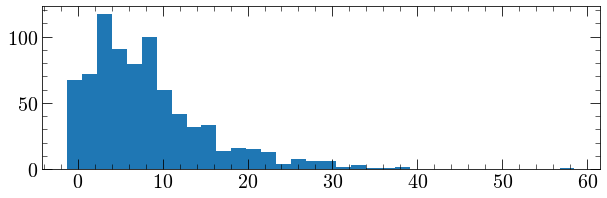

In [82]:
catalog = table.copy()

plt.figure(figsize=(10,3))
plt.hist(catalog['Plx'])

In [83]:
from astroquery.gaia import Gaia

ADQL_CODE1 = """SELECT dist.source_id, dist.r_med_geo
        FROM gaiadr3.gaia_source as gaia
        JOIN external.gaiaedr3_distance as dist
        ON gaia.source_id = dist.source_id      
        WHERE gaia.source_id in {}""".format(tuple(catalog['source_id']))
gaia_d1 = Gaia.launch_job(ADQL_CODE1,dump_to_file=False).get_results()
        
catalog = join(catalog, gaia_d1, keys = 'source_id')

In [84]:
from __future__ import print_function
from astropy.coordinates import SkyCoord
import astropy.units as u
from dustmaps.edenhofer2023 import Edenhofer2023Query

import pyphot
import extinction

#catalog['r_med_geo'] = 100 / catalog['PARALLAX']

# Coordinates using inverted parallax distances
coords = [SkyCoord(frame="icrs", ra=catalog['ra'][i]*u.deg, dec=catalog['dec'][i]*u.deg, distance = catalog['r_med_geo'][i] * u.pc) for i in range(len(catalog))]
catalog['wd_coords'] = coords


# Query Edenhofer2023 to get E(B-V) in arbitrary units
bsq = Edenhofer2023Query()
bsq_res = bsq.query(catalog['wd_coords']).copy()
bsq_res[np.isnan(bsq_res)] = 0

# Convert to actual units
Ebv = bsq_res*0.901*0.98
e_Ebv = Ebv*0.2

catalog['E(B-V)'] = Ebv
catalog['e_E(B-V)'] = e_Ebv


# Parameters for correcting using Gaia
Rv = 3.1
catalog['A_v0'] = catalog['E(B-V)']*Rv

# Fetch Gaia photometric band wavelengths and store in `gaia_phot_wavl`
lib = pyphot.get_library()
gaia_phot = [lib['Gaia_G'], lib['Gaia_BP'], lib['Gaia_RP']]
gaia_phot_wavl = np.array([x.lpivot.to('angstrom').value for x in gaia_phot])


# For each point, find extinction using the parameters we defined above
ext_all = []
for av0 in catalog['A_v0']:
    ext_all.append( extinction.fitzpatrick99(gaia_phot_wavl, av0, Rv) )
ext_all = np.array(ext_all)
    
# Save the extinction in each band
catalog['BP_ext'] = ext_all.T[0]
catalog['RP_ext'] = ext_all.T[1]

# Subtract out the extinction to find de-reddened magnitude
catalog['GAIA_G'] = catalog['Gmag'] - catalog['BP_ext']
catalog['GAIA_BP'] = catalog['BPmag'] - catalog['BP_ext']
catalog['GAIA_RP'] = catalog['RPmag'] - catalog['RP_ext']

Optimizing map for querying (this might take a couple of seconds)...


In [85]:
catalog['abs_g'] = catalog['GAIA_G'] - 5 * np.log10(catalog['r_med_geo']) + 5
catalog['abs_bp'] = catalog['GAIA_BP'] - 5 * np.log10(catalog['r_med_geo']) + 5
catalog['abs_rp'] = catalog['GAIA_RP'] - 5 * np.log10(catalog['r_med_geo']) + 5

catalog['bp_rp'] = catalog['abs_bp'] - catalog['abs_rp']

catalog['abs_w1'] = catalog['W1mag'] - 5 * np.log10(catalog['r_med_geo'])# + 5
catalog['abs_w2'] = catalog['W2mag'] - 5 * np.log10(catalog['r_med_geo'])# + 5
catalog['abs_w3'] = catalog['W3mag'] - 5 * np.log10(catalog['r_med_geo'])# + 5
#catalog['abs_w4'] = catalog['w4mpro'] + 5 * np.log10(catalog['PARALLAX'] / 100)

catalog['distance'] = catalog['r_med_geo']

In [92]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from IPython.utils import io

drops = []

for i in tqdm(range(len(catalog))):   
    coord = SkyCoord(ra=catalog['ra'][i], dec=catalog['dec'][i], unit=(u.degree, u.degree), frame='icrs')
    
    with io.capture_output() as captured:
        j = Gaia.cone_search_async(coord, radius=u.Quantity(6.0, u.arcsec), verbose = False).get_results();
    
    if len(j) != 1:
        drops.append(1)
    else:
        drops.append(0)

100%|██████████| 760/760 [19:49<00:00,  1.57s/it]


In [93]:
print(sum(drops))
catalog.remove_rows(drops)

760


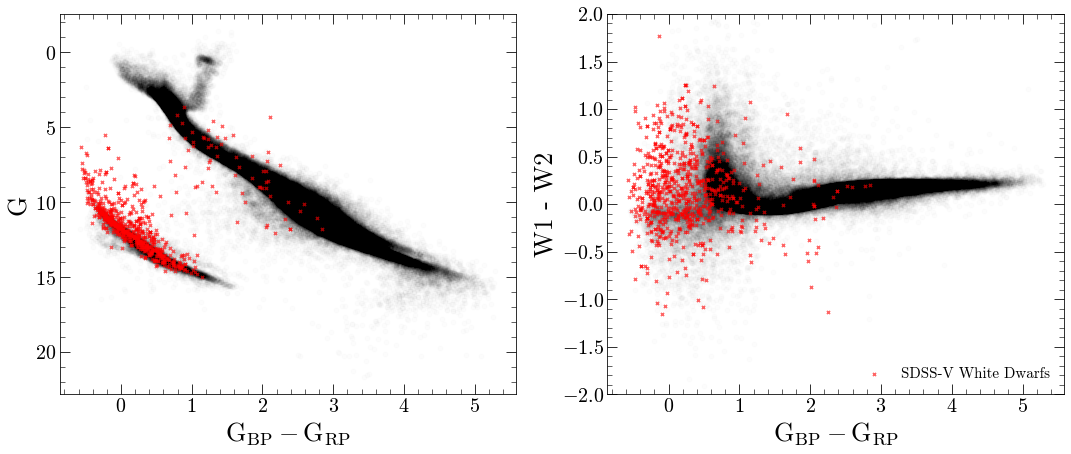

In [96]:
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)

plt.scatter(allstars['abs_bp'] - allstars['abs_rp'], allstars['abs_g'], c = 'k', alpha = 0.01)
plt.scatter(catalog['abs_bp'] - catalog['abs_rp'], catalog['abs_g'],  c = 'red', alpha = 0.6, marker = 'x', s = 10, label = 'SDSS-V White Dwarfs')

plt.xlabel(r'$G_{BP} - G_{RP}$')
plt.ylabel('G')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)

plt.scatter(allstars['abs_bp'] - allstars['abs_rp'], allstars['abs_w1'] - allstars['abs_w2'], c = 'k', alpha = 0.01)
plt.scatter(catalog['abs_bp'] - catalog['abs_rp'], catalog['abs_w1'] - catalog['abs_w2'], c = 'red', alpha = 0.6, marker = 'x', s = 10, label = 'SDSS-V White Dwarfs')

plt.legend(framealpha = 0)

plt.ylim(-2,2)

plt.xlabel(r'$G_{BP} - G_{RP}$')
plt.ylabel('W1 - W2')

plt.savefig('plots/wise_cmd.pdf')

In [ ]:
import sys
sys.path.append('../corv/src')

import pyphot
from pyphot import unit
import corv
import lmfit

base_wavl, tremblay, table = corv.utils.build_montreal_da(path = '/home/sarsene1/corv/src/corv/models/montreal_da', flux_unit = 'flam')

lib = pyphot.get_library()
filters = [lib['Gaia_BP'], lib['Gaia_RP']]

c = 2.998e10
k = 1.38e-16
h = 6.626e-27
halpha = 6564.61
hbeta = 4862.68
hgamma = 4341.68
hdelta = 4102.89
speed_light = 299792458 #m/s
mass_sun = 1.9884e30
newton_G = 6.674e-11
pc_to_m = 3.086775e16
radius_sun = 6.957e8

def mag_to_flux_spec(mag, filt, e_mag = None):
    if e_mag is not None:
        return (10**( (mag + filt.Vega_zero_mag) / -2.5 ), np.sqrt((-0.921034 * 10**(-0.4 * (mag + filt.Vega_zero_mag)) * e_mag)**2 ))
    else:
        return 10**( (mag + filt.Vega_zero_mag) / -2.5 )

def template(teff, logg, radius, distance):
    fl = tremblay((teff, logg))
    
    radius = radius * radius_sun # Rsun to meter
    distance = distance * pc_to_m # Parsec to meter
    
    fl = 4*np.pi*(radius / distance)**2 * fl
    return fl
    

def get_model_flux_gaia_spec(params):
    teff, logg, radius, distance = params['teff'], params['logg'], params['radius'], params['distance']
    
    fl = template(teff, logg, radius, distance) 
            
    flux = np.array([filters[i].get_flux(base_wavl * unit['angstrom'], fl * unit['erg/s/cm**2/angstrom'], axis = 1).to('erg/s/cm**2/angstrom').value for i in range(len(filters))])
    #mag = np.array([-2.5*np.log10(filters[i].get_flux(base_wavl * unit['AA'], fl * unit['erg/s/cm**2/AA'], axis = 1).value) - filters[i].Vega_zero_mag for i in range(len(filters))])
    return flux
    

def residual_gaia(params, obs_flux = None, e_obs_flux = None):
    model_flux = get_model_flux_gaia_spec(params)

    chisquare = ((model_flux - obs_flux) / e_obs_flux)**2
    
    #chisquare[np.isnan(chisquare)] = 1e8
    return chisquare



def get_parameters_gaia(obs_flux, e_obs_flux, id_ = None, floor_error = 0.02, make_plot = False, vary_logg = False, p0 = [10000, 8, 0.01, 100]):         
    params = lmfit.Parameters()

    params.add('teff', value = p0[0], min = 4001, max = 100000, vary = False)
    params.add('logg', value = p0[1], min=5, max=9, vary=False)
    params.add('radius', value = p0[2], min = 0.000001, max = 0.07, vary = True)
    params.add('distance', value = p0[3], min = 1, max = 2000, vary = False)
            
    result = lmfit.minimize(residual_gaia, params, kws = dict(obs_flux = obs_flux, e_obs_flux = e_obs_flux), method = 'leastsq')
            
    return result

In [ ]:
teff = []
logg = []
radius = []
drops = []

for i in tqdm(range(len(catalog))):
    obs_flux = [#mag_to_flux_spec(catalog['abs_g'][i], filters[0]),
                mag_to_flux_spec(catalog['phot_bp_mean_mag'][i], filters[0]), 
                mag_to_flux_spec(catalog['phot_rp_mean_mag'][i], filters[1])]
    e_obs_flux_gaia = np.array([obs_flux[0] * 1.09 * catalog['phot_bp_mean_flux_error'][i],
                                obs_flux[1] * 1.09 * catalog['phot_rp_mean_flux_error'][i]])
    
    try:
        temp = get_parameters_gaia(obs_flux, e_obs_flux_gaia, p0 = [catalog['teff_snowwhite'][i], catalog['logg_snowwhite'][i], 0.01, catalog['distance'][i]])
    
        teff.append(temp.params['teff'].value)
        logg.append(temp.params['logg'].value)
        radius.append(temp.params['radius'].value)
    except:
        drops.append(i)
    
catalog.remove_rows(drops)
catalog['fit_teff'] = teff
catalog['fit_logg'] = logg
catalog['fit_radius'] = radius

In [ ]:
lib = pyphot.get_library()
filt_full = [lib['Gaia_G'], lib['Gaia_BP'], lib['Gaia_RP'], lib['WISE_RSR_W1'], lib['WISE_RSR_W2']]

w1_dists = []
w2_dists = []

id_ = []

for i in tqdm(range(len(catalog))):
    fl = 4 * np.pi *tremblay((catalog['fit_teff'][i], catalog['fit_logg'][i])) * ( (catalog['fit_radius'][i] * radius_sun) / (catalog['distance'][i] * pc_to_m)) **2
    
    wavl = [filt_full[i].lpivot.to('angstrom').value for i in range(len(filt_full))]
    phot_flux = [filt_full[i].get_flux(base_wavl * unit['AA'], fl * unit['erg/s/cm**2/AA'], axis = 1).value for i in range(len(filt_full))]
    phot_mag = np.array([-2.5*np.log10(filt_full[i].get_flux(base_wavl * unit['AA'], fl * unit['erg/s/cm**2/AA'], axis = 1).value) \
                         - filt_full[i].Vega_zero_mag for i in range(len(filt_full))])
    
    obs_flux = np.array([mag_to_flux_spec(catalog['phot_g_mean_mag'][i], filt_full[0]),
                        mag_to_flux_spec(catalog['phot_bp_mean_mag'][i], filt_full[1]),
                        mag_to_flux_spec(catalog['phot_rp_mean_mag'][i], filt_full[2]),
                        mag_to_flux_spec(catalog['w1mpro'][i], filt_full[3]),
                        mag_to_flux_spec(catalog['w2mpro'][i], filt_full[4])])
    e_obs_flux = np.array([catalog['phot_g_mean_flux_error'][i] * 1.736011e-33 * 2.99792458e+21 / 6217.9**2,
                            catalog['phot_bp_mean_flux_error'][i] * 2.620707e-33 * 2.99792458e+21 / 5109.7**2,
                             catalog['phot_rp_mean_flux_error'][i] * 3.2988153e-33 * 2.99792458e+21 / 7769.1**2,
                            obs_flux[3] * 1.09 * catalog['w1sigm'][i],
                            obs_flux[4] * 1.09 * catalog['w2sigm'][i]])

    
    
    e_w1 = obs_flux[-2] * 1.09 * catalog['w1sigm'][i]
    e_w2 = obs_flux[-1] * 1.09 * catalog['w2sigm'][i]
    w1_dist = (obs_flux[-2] - phot_flux[-2]) / e_w1
    w2_dist = (obs_flux[-1] - phot_flux[-1]) / e_w2
    
    w1_dists.append(w1_dist)
    w2_dists.append(w2_dist)
    id_.append(i)
    
    plt.figure(figsize=(18,7))
    
    plt.subplot(1,2,1)
    
    mask1 = (3600 < base_wavl) * (base_wavl < 9000)
    
    plt.plot(base_wavl[mask1], fl[mask1], c = 'k')
    plt.errorbar([filt_full[j].lpivot.to('angstrom').value for j in range(len(filt_full))][:2], obs_flux[:2], yerr = e_obs_flux[:2], 
                 linestyle = 'none', marker = 'None', color = 'k', capsize = 5, label = 'Observed SED', zorder = 10)
    plt.scatter(wavl[:2], phot_flux[:2], c = 'blue', alpha = 0.7)
    #plt.errorbar(wavl[:2], phot_flux[:2], yerr = e_obs_flux[:2], linestyle = 'none', marker = 'None', color = 'k', capsize = 5, label = 'Observed SED', zorder = 10)

    
    plt.text(0.05, 0.20, "$T_{eff}$" + " = {:2.6} $K$".format(catalog['fit_teff'][i]), transform = plt.gca().transAxes, fontsize = 18)
    plt.text(0.05, 0.15, "$\log g$" + " = {:2.5f}".format(catalog['fit_logg'][i]), transform = plt.gca().transAxes, fontsize = 18)
    plt.text(0.05, 0.05, '$Distance = ${:2.1f} $pc$'.format(catalog['distance'][i]), transform = plt.gca().transAxes, fontsize=18)
    plt.text(0.05, 0.10, r'$Radius = ${:2.5f} $R_\odot$'.format(catalog['fit_radius'][i]), transform = plt.gca().transAxes, fontsize = 18)
    
    #plt.ylim(0.7*min(fl), 1.3*max(fl))
    
    plt.xlim((3600, 9000))
    plt.xlabel(r'Wavelength $[\AA]$')
    plt.ylabel('Flux $[erg/s/cm^2/\AA]$')
    
    plt.subplot(1,2,2)
    
    mask2 = (30000 < base_wavl) * (base_wavl < 50000)
    
    plt.plot(base_wavl, fl, c = 'k')
    plt.errorbar([filt_full[j].lpivot.to('angstrom').value for j in range(len(filt_full))], obs_flux, yerr = e_obs_flux, 
                 linestyle = 'none', marker = 'None', color = 'k', capsize = 5, label = 'Observed SED', zorder = 10)
    plt.scatter(wavl, phot_flux, c = 'blue', alpha = 0.7, label = 'Model SED')

    
    plt.text(0.05, 0.15, "$W1$ Distance" + " = {:2.2}".format(w1_dist), transform = plt.gca().transAxes, fontsize = 18)
    plt.text(0.05, 0.10, "$W2$ Distance" + " = {:2.2}".format(w2_dist), transform = plt.gca().transAxes, fontsize = 18)
    
    plt.yscale('log')
    plt.xlim(2500,50000)
    plt.xlabel(r'Wavelength $[\AA]$')
    plt.ylabel(r'Flux $[erg/s/cm^2/\AA]$')
    
    plt.legend(framealpha = 0)

    plt.savefig('plots/sed_fits/{}_sedfit.png'.format(i))
    
    plt.close()
    
catalog['id'] = id_
catalog['w1_dist'] = w1_dists
catalog['w2_dist'] = w2_dists

In [ ]:
plt.figure(figsize = (10,7))

plt.scatter(catalog['w1_dist'], catalog['w2_dist'], c = 'k')

plt.xlabel(r'W1 $\chi$')
plt.ylabel(r'W2 $\chi$')

#plt.xlim(-0.01e-14, 0.15e-14)
#plt.ylim(-0.01e-15, 0.5e-15)

plt.savefig('plots/WISE_discrepancy.pdf')

In [ ]:
mask = np.all([catalog['w1_dist'] > 3, catalog['w2_dist'] > 3], axis = 0)

print(catalog[mask][['ra_01', 'dec_01']])

In [ ]:
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)

plt.scatter(allstars['abs_bp'] - allstars['abs_rp'], allstars['abs_g'], c = 'k', alpha = 0.01)
plt.scatter(catalog['abs_bp'] - catalog['abs_rp'], catalog['abs_g'],  c = 'red', alpha = 0.6, marker = 'x', s = 10, label = 'SDSS-V White Dwarfs')
plt.scatter(catalog[mask]['abs_bp'] - catalog[mask]['abs_rp'], catalog[mask]['abs_g'],  c = 'yellow', alpha = 0.6, marker = 'x', s = 10, label = 'Possible IR Excess')


plt.xlabel(r'$G_{BP} - G_{RP}$')
plt.ylabel('G')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)

plt.scatter(allstars['abs_bp'] - allstars['abs_rp'], allstars['abs_w1'] - allstars['abs_w2'], c = 'k', alpha = 0.01)
plt.scatter(catalog['abs_bp'] - catalog['abs_rp'], catalog['abs_w1'] - catalog['abs_w2'], c = 'red', alpha = 0.6, marker = 'x', s = 10, label = 'SDSS-V White Dwarfs')
plt.scatter(catalog[mask]['abs_bp'] - catalog[mask]['abs_rp'], catalog[mask]['abs_w1'] - catalog[mask]['abs_w2'], c = 'yellow', alpha = 0.6, marker = 'x', s = 10, label = 'Possible IR Excess')


plt.legend(framealpha = 0)

plt.ylim(-2,2)

plt.xlabel(r'$G_{BP} - G_{RP}$')
plt.ylabel('W1 - W2')

plt.savefig('plots/wise_cmd_final.pdf')

In [ ]:
import numpy
from astropy.table import Table
import requests
from PIL import Image
from io import BytesIO

def getimages(ra,dec,filters="grizy"):
    
    """Query ps1filenames.py service to get a list of images
    
    ra, dec = position in degrees
    size = image size in pixels (0.25 arcsec/pixel)
    filters = string with filters to include
    Returns a table with the results
    """
    
    service = "https://ps1images.stsci.edu/cgi-bin/ps1filenames.py"
    url = f"{service}?ra={ra}&dec={dec}&filters={filters}"
    table = Table.read(url, format='ascii')
    return table


def geturl(ra, dec, size=240, output_size=None, filters="grizy", format="jpg", color=False):
    
    """Get URL for images in the table
    
    ra, dec = position in degrees
    size = extracted image size in pixels (0.25 arcsec/pixel)
    output_size = output (display) image size in pixels (default = size).
                  output_size has no effect for fits format images.
    filters = string with filters to include
    format = data format (options are "jpg", "png" or "fits")
    color = if True, creates a color image (only for jpg or png format).
            Default is return a list of URLs for single-filter grayscale images.
    Returns a string with the URL
    """
    
    if color and format == "fits":
        raise ValueError("color images are available only for jpg or png formats")
    if format not in ("jpg","png","fits"):
        raise ValueError("format must be one of jpg, png, fits")
    table = getimages(ra,dec,filters=filters)
    url = (f"https://ps1images.stsci.edu/cgi-bin/fitscut.cgi?"
           f"ra={ra}&dec={dec}&size={size}&format={format}")
    if output_size:
        url = url + "&output_size={}".format(output_size)
    # sort filters from red to blue
    flist = ["yzirg".find(x) for x in table['filter']]
    table = table[numpy.argsort(flist)]
    if color:
        if len(table) > 3:
            # pick 3 filters
            table = table[[0,len(table)//2,len(table)-1]]
        for i, param in enumerate(["red","green","blue"]):
            url = url + "&{}={}".format(param,table['filename'][i])
    else:
        urlbase = url + "&red="
        url = []
        for filename in table['filename']:
            url.append(urlbase+filename)
    return url


def getcolorim(ra, dec, size=240, output_size=None, filters="grizy", format="jpg"):
    
    """Get color image at a sky position
    
    ra, dec = position in degrees
    size = extracted image size in pixels (0.25 arcsec/pixel)
    output_size = output (display) image size in pixels (default = size).
                  output_size has no effect for fits format images.
    filters = string with filters to include
    format = data format (options are "jpg", "png")
    Returns the image
    """
    
    if format not in ("jpg","png"):
        raise ValueError("format must be jpg or png")
    url = geturl(ra,dec,size=size,filters=filters,output_size=output_size,format=format,color=True)
    r = requests.get(url)
    im = Image.open(BytesIO(r.content))
    return im

In [ ]:
from astroquery.skyview import SkyView
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from astropy.visualization import astropy_mpl_style

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

from astroquery.sdss import SDSS

plt.style.use('../gravitational-redshift/stefan.mplstyle')

for i in tqdm(range(len(catalog[mask]))):
    coords = SkyCoord(catalog[mask]['ra_01'], catalog[mask]['dec_01'], unit = (u.deg, u.deg))
    
    paths_wise = SkyView.get_image_list(position=coords[i], survey=['WISE 3.4', 'WISE 4.6'], radius = 30*u.arcsec, grid = False)
    paths_compare = getcolorim(coords[i].ra.value, coords[i].dec.value, size=120, filters="grz")
    
    fig,ax = plt.subplots(ncols = 3, figsize = (30,9))
    
    
    ax[0].set_aspect('equal')
    
    # Show the image
    ax[0].imshow(fits.open(paths_wise[0])[0].data, cmap = 'gray')
    
    xmin, xmax = ax[0].get_xlim()
    ymin, ymax = ax[0].get_ylim()
    
    center = ((xmin + xmax) / 2, (ymin + ymax) / 2)
    radius = (5 / 30) * (np.abs(xmin) + np.abs(xmax))
    
    # Now, loop through coord arrays, and create a circle at each x,y pair
    circ = patch.Circle(center,radius, fill = False, color = 'blue')
    ax[0].add_patch(circ)
    
    ax[0].set_title('WISE 3.4 Image {}'.format(catalog[mask]['id'][i]))
    
    ax[0].set_aspect('equal')
    
    # Show the image
    try:
        ax[1].imshow(fits.open(paths_wise[1])[0].data, cmap = 'gray')
    
        xmin, xmax = ax[1].get_xlim()
        ymin, ymax = ax[1].get_ylim()
        
        center = ((xmin + xmax) / 2, (ymin + ymax) / 2)
        radius = (5 / 30) * (np.abs(xmin) + np.abs(xmax))
        
        # Now, loop through coord arrays, and create a circle at each x,y pair
        circ = patch.Circle(center,radius, fill = False, color = 'blue')
        ax[1].add_patch(circ)
    except:
        pass
    
    # Show the image
    try:
        ax[2].imshow(paths_compare)
    
        xmin, xmax = ax[2].get_xlim()
        ymin, ymax = ax[2].get_ylim()
        
        center = ((xmin + xmax) / 2, (ymin + ymax) / 2)
        radius = (5 / 30) * (np.abs(xmin) + np.abs(xmax))
        
        # Now, loop through coord arrays, and create a circle at each x,y pair
        circ = patch.Circle(center,radius, fill = False, color = 'blue')
        ax[2].add_patch(circ)
    except:
        pass
    
    ax[1].set_title('WISE 4.6 Image {}'.format(catalog[mask]['id'][i]))
    ax[2].set_title('PanSTARRS DR1 Image {}'.format(catalog[mask]['id'][i]))

    
    plt.savefig('plots/skyviews/{}_WISE.png'.format(catalog[mask]['id'][i]))
    plt.close()

In [ ]:
catalog.write('data/01_ir_excess.fits', overwrite = True)